<a href="https://colab.research.google.com/github/abhi-shek-solanki/zeotap/blob/main/Abhishek_Solanki_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK - 1**

In [ ]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data

df_customers = pd.read_csv('/content/Project/Customers.csv')
df_products = pd.read_csv('/content/Project/Products.csv')
df_transaction = pd.read_csv('/content/Project/Transactions.csv')


Cheking the column of the data

In [ ]:
# lets check which are the columns present in our data

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


Cheking if any null value is present

In [ ]:
df_customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
df_products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [ ]:
df_transaction.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


So seeing above there is no null values are present in our data lets perform some EDA on our data and try to get some usefull insight from it.

# Lets analyze our customer table

In [ ]:
# cheking first 5 rows

df_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
# now lets see which are the regions that are present in our data

Regions = df_customers['Region'].unique()
print(Regions)

['South America' 'Asia' 'North America' 'Europe']


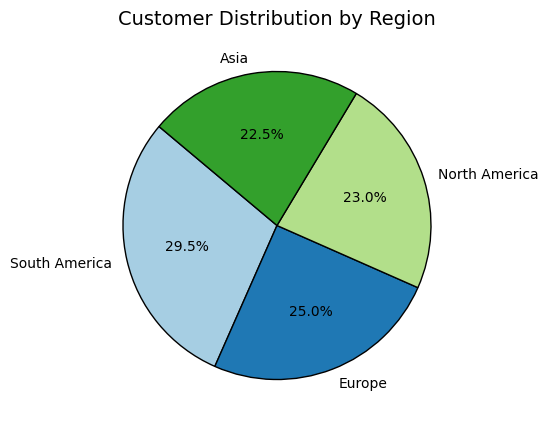

In [ ]:
# There are four regions now lets check no of people in that region meaning which region is popular

df_customers['Region'].value_counts()
import matplotlib.pyplot as plt

# Count the number of customers per region
region_counts = df_customers['Region'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',  # Show percentage
    colors=plt.cm.Paired.colors,  # Different colors
    startangle=140,  # Rotate for better visibility
    wedgeprops={'edgecolor': 'black'}  # Add border to slices
)

# Title
plt.title('Customer Distribution by Region', fontsize=14)

# Display the chart
plt.show()


By seeing above figure  our customer are mostly from south America and less people from Asia .

## **Lets Analyze our product table**

In [ ]:
# cheking first 5 rows

df_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
# Lets check which are categories present in our data

categories = df_products['Category'].unique()
print(categories)

['Books' 'Electronics' 'Home Decor' 'Clothing']


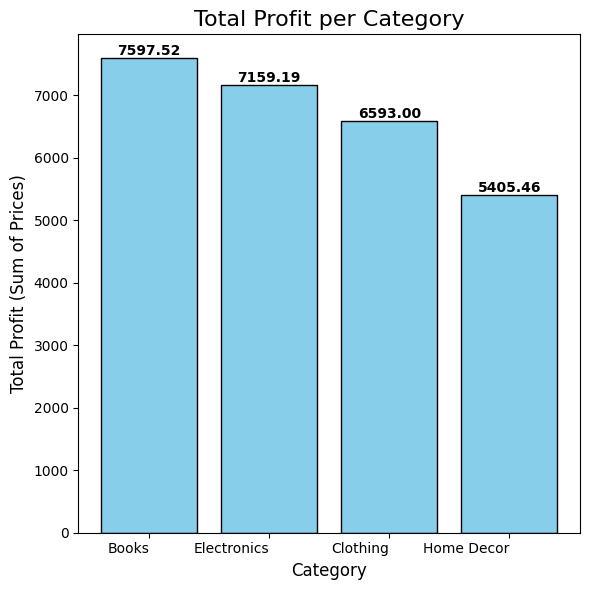

In [ ]:
# There are four categories present now lets find the profit per categories

profit_per_category = df_products.groupby('Category')['Price'].sum()

# Group by category and sum the prices
profit_per_category = df_products.groupby('Category')['Price'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(profit_per_category.index, profit_per_category.values, color='skyblue', edgecolor='black')

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and Title
plt.title('Total Profit per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit (Sum of Prices)', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


From seeing above figure people are buying mostly books and electronics item more than those clothing and home decor

# **Lets analyze our Transaction table**

In [ ]:
df_transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
df_transaction.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


From above we can see our mean values of products

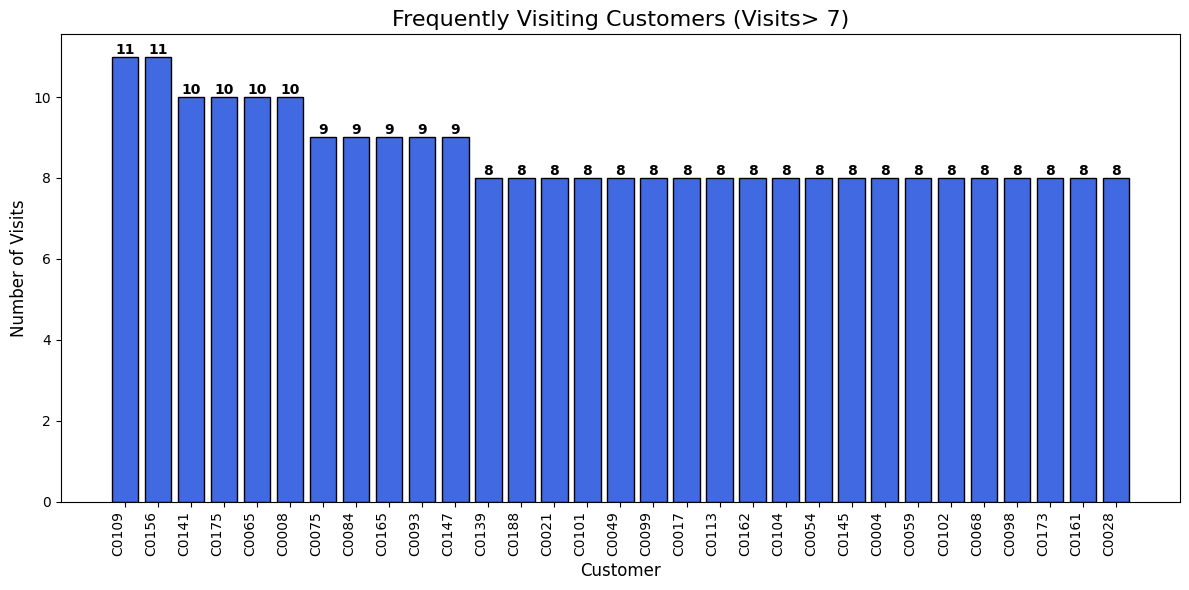

In [ ]:
# Lets find our frequently visiting customers

visiting_customers = df_transaction['CustomerID'].value_counts()

frequently_visiting_customers = visiting_customers[visiting_customers > 7]


# plot it in graph

import matplotlib.pyplot as plt

# Filter customers who visited 5 or more times
frequently_visiting_customers = visiting_customers[visiting_customers > 7].sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(frequently_visiting_customers.index, frequently_visiting_customers.values, color='royalblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and Title
plt.title('Frequently Visiting Customers (Visits> 7)', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# lets check how much amount customer has paid means which is our top 10 buyer

top_customers = df_transaction.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers.head(10)

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91
C0188,7111.32
C0059,7073.28
C0028,6819.57
C0099,6715.72


# **Now lets cross check if frequently buying customer is there as most buying**

In [ ]:
# cross - cheking the customer

cross_cheking_customer = top_customers.index.intersection(frequently_visiting_customers.index)
cross_cheking_customer


Index(['C0141', 'C0054', 'C0065', 'C0156', 'C0188', 'C0059', 'C0028', 'C0099',
       'C0165', 'C0104', 'C0175', 'C0102', 'C0068', 'C0075', 'C0173', 'C0145',
       'C0101', 'C0109', 'C0021', 'C0004', 'C0093', 'C0113', 'C0162', 'C0017',
       'C0084', 'C0008', 'C0139', 'C0098', 'C0161', 'C0147', 'C0049'],
      dtype='object', name='CustomerID')

Above are our most valuable customers whom we cannot loose at any cost

# **At last lets check revenue region wise**

In [ ]:
# cheking revenue region wise

# For that we have to merge transaction and cutomer table

new_data = pd.merge(df_transaction, df_customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# now lets find revenue region wise

revenue_region_wise = new_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_region_wise)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


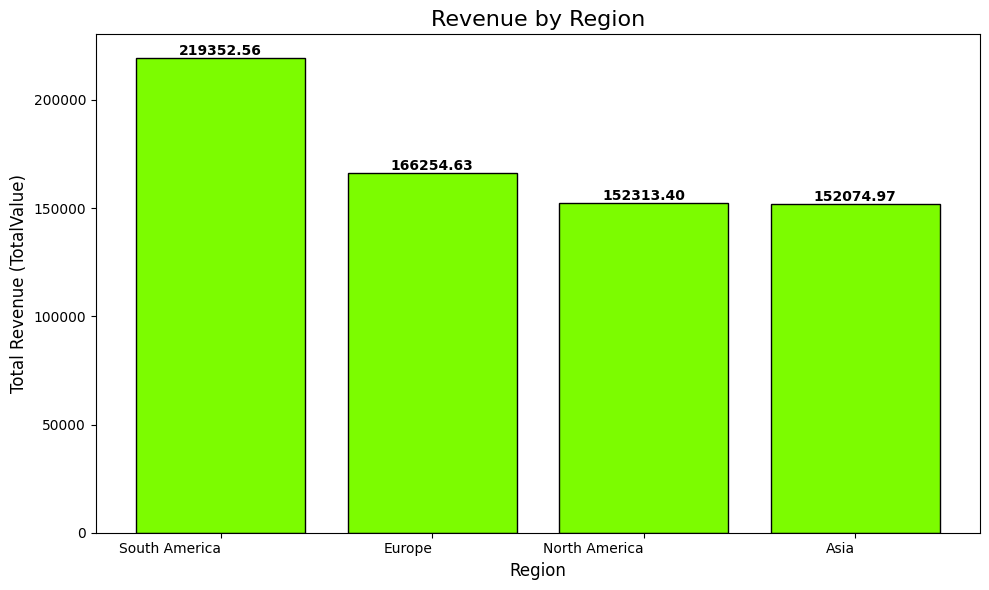

In [ ]:
import matplotlib.pyplot as plt

# Group by Region and sum the revenue
revenue_region_wise = new_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_region_wise.index, revenue_region_wise.values, color='lawngreen', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and Title
plt.title('Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (TotalValue)', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


so from above we can easily say that south america has the highest profit.